In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [165]:
path='archive (2)/CK+48'
for i in path:
    print(i)

a
r
c
h
i
v
e
 
(
2
)
/
C
K
+
4
8


In [155]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   validation_split=0.6,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('archive (2)/CK+48',
                                                 target_size = (48,48),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 981 images belonging to 7 classes.


In [156]:
import cv2
img=cv2.imread('archive (2)\CK+48\sadness\S014_002_00000015.png')

In [157]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, Dropout, LayerNormalization
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

In [158]:
model = Sequential()
model.add(Conv2D(input_shape=(48,48, 3), filters=32, kernel_size=(7, 7), strides=4, padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(LayerNormalization())
model.add(Conv2D(filters=64, kernel_size=(5, 5), strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(LayerNormalization())
model.add(Conv2D(filters=256, kernel_size=(3, 3), strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(LayerNormalization())
model.add(Flatten())
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=7, activation='sigmoid'))
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_64 (Conv2D)          (None, 11, 11, 32)        4736      
                                                                 
 max_pooling2d_64 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 layer_normalization_56 (Lay  (None, 5, 5, 32)         64        
 erNormalization)                                                
                                                                 
 conv2d_65 (Conv2D)          (None, 5, 5, 64)          51264     
                                                                 
 max_pooling2d_65 (MaxPoolin  (None, 2, 2, 64)         0         
 g2D)                                                            
                                                     

In [159]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [160]:
model.fit(x=training_set,validation_data = training_set, epochs = 25)

Epoch 1/25
31/31 [==============================] - 6s 166ms/step - loss: 2.1068 - accuracy: 0.2049 - val_loss: 1.9275 - val_accuracy: 0.1804
Epoch 2/25
31/31 [==============================] - 4s 127ms/step - loss: 1.9097 - accuracy: 0.2375 - val_loss: 1.8424 - val_accuracy: 0.2538
Epoch 3/25
31/31 [==============================] - 4s 127ms/step - loss: 1.8549 - accuracy: 0.2691 - val_loss: 1.7389 - val_accuracy: 0.3364
Epoch 4/25
31/31 [==============================] - 4s 127ms/step - loss: 1.4463 - accuracy: 0.4924 - val_loss: 1.2093 - val_accuracy: 0.5678
Epoch 5/25
31/31 [==============================] - 4s 129ms/step - loss: 1.1137 - accuracy: 0.5810 - val_loss: 0.9197 - val_accuracy: 0.6381
Epoch 6/25
31/31 [==============================] - 4s 127ms/step - loss: 0.9873 - accuracy: 0.6198 - val_loss: 0.8378 - val_accuracy: 0.6799
Epoch 7/25
31/31 [==============================] - 4s 129ms/step - loss: 0.8496 - accuracy: 0.6769 - val_loss: 0.6389 - val_accuracy: 0.7635
Epoch 

In [161]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('archive (2)\CK+48\surprise\S011_001_00000015.png', target_size = (48,48))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

In [162]:
result

array([[0.29195195, 0.0015313 , 0.14294416, 0.5718715 , 0.0012624 ,
        0.7215737 , 0.9997586 ]], dtype=float32)

In [163]:
np.argmax(result[0])

6

In [154]:
from PIL import Image

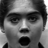

In [150]:
image = Image.open('archive (2)\CK+48\surprise\S011_001_00000015.png')

image

In [145]:
import cv2
img=cv2.imread('archive (2)\CK+48\sadness\S014_002_00000015.png')

In [146]:
img.shape

(48, 48, 3)